

# CAPSTONE PROJECT                                                               

## Healthcare Dataset



### Background

**Diabetes**, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period.  Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger.  If left untreated, diabetes can cause many complications.  Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death.  Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This **dataset** is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### Data


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* **Pregnancies**: Number of times pregnant
* **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* **BloodPressure**: Diastolic blood pressure (mm Hg)
* **SkinThickness**: Triceps skin fold thickness (mm)
* **Insulin**: 2-Hour serum insulin (mu U/ml)
* **BMI**: Body mass index (weight in kg/(height in m)^2)
* **DiabetesPedigreeFunction**: Diabetes pedigree function
* **Age**: Age (years)
* **Outcome**: Class variable (0 or 1)


#### Author: Rijo Rajan

### Loading Libraries and Dataset

In [66]:
#importing
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import os
import missingno as msno
import statistics as st

import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)

from chart_studio.plotly import plot, iplot

from plotly import tools 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
data=pd.read_csv("D:\Capstone\Healthcare_Diabetes\healthcare.csv")

In [3]:
data_raw=data.copy()

In [4]:
# To display the top 5 rows
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Total number of rows and columns
data.shape

(768, 9)

In [6]:
# Checking the data type
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.count() 

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#summarize information ion called dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
Positive = data[data['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


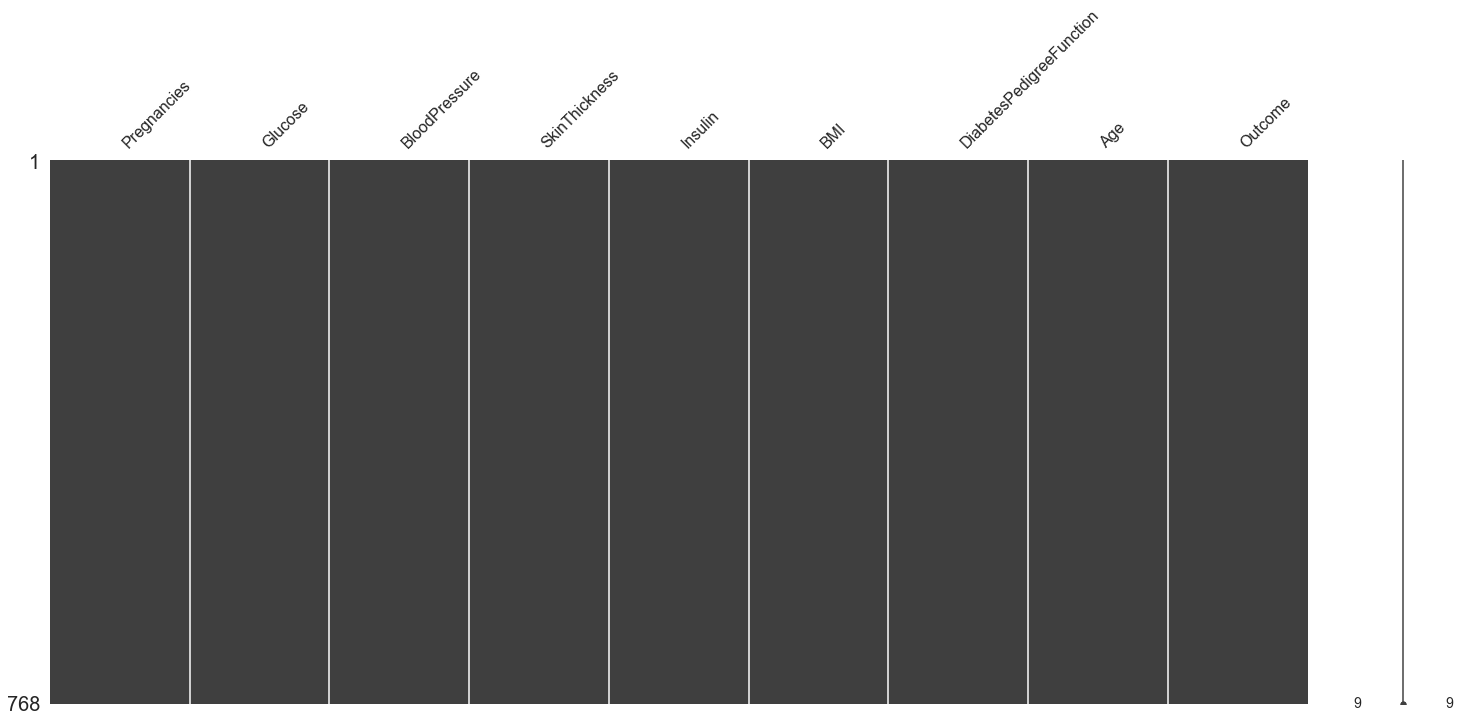

In [75]:
# Matrix Visualization of Handled Values
msno.matrix(data)

In [67]:
# Make figure with subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"},
                                            {"type": "surface"}]])

# Add bar traces to subplot (1, 1)
fig.add_trace(go.Bar(y=[2, 1, 3]), row=1, col=1)
fig.add_trace(go.Bar(y=[3, 2, 1]), row=1, col=1)
fig.add_trace(go.Bar(y=[2.5, 2.5, 3.5]), row=1, col=1)

# Add surface trace to subplot (1, 2)
# Read data from a csv
z_data = pd.read_csv("D:\CA\Project_2\Project 2\Healthcare - Diabetes\health care diabetes.csv")
fig.add_surface(z=z_data)

# Hide legend
fig.update_layout(
    showlegend=False,
    title_text="Demo Default Theme",
    height=500,
    width=900,
)

fig.show()

## Dist Plot

Dist Plot helps us to flexibly plot a univariate distribution of observations.

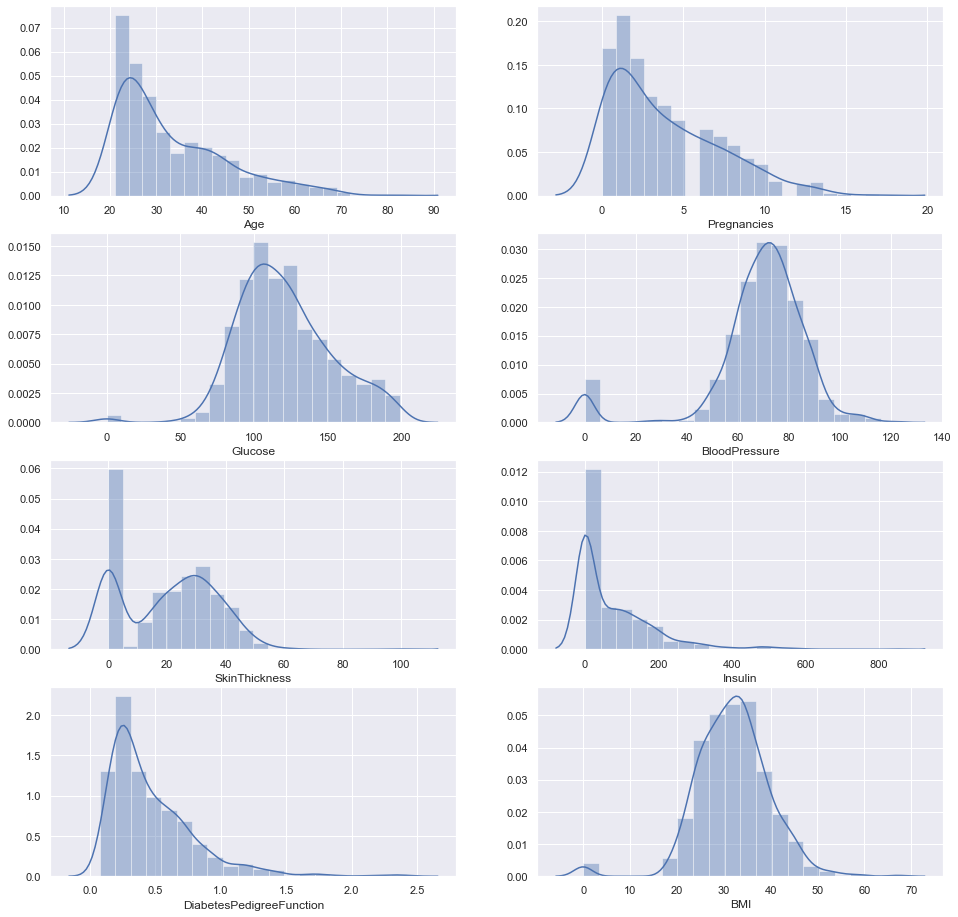

In [13]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(data.Pregnancies, bins = 20, ax=ax[0,1]) 

sns.distplot(data.Glucose, bins = 20, ax=ax[1,0]) 

sns.distplot(data.BloodPressure, bins = 20, ax=ax[1,1])

sns.distplot(data.SkinThickness, bins = 20, ax=ax[2,0])

sns.distplot(data.Insulin, bins = 20, ax=ax[2,1])

sns.distplot(data.BMI, bins = 20, ax=ax[3,1])

sns.distplot(data.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 

sns.distplot(data.Age, bins = 20, ax=ax[0,0]) 

### Create a count (frequency) plot describing the data types and the count of variables

In [14]:
# Predictor Variable Analysis 

In [15]:
data['Pregnancies'].value_counts().head(7)

1    135
0    111
2    103
3     75
4     68
5     57
6     50
Name: Pregnancies, dtype: int64

(array([246., 178., 125.,  50.,  83.,  52.,  11.,  19.,   3.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <a list of 10 Patch objects>)

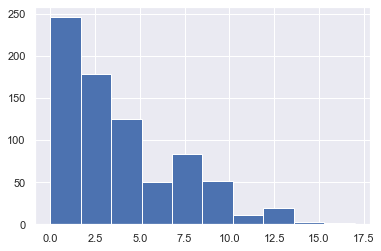

In [16]:
plt.hist(data['Pregnancies'])

In [17]:
data['Glucose'].value_counts().head(7)

100    17
99     17
129    14
125    14
111    14
106    14
95     13
Name: Glucose, dtype: int64

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

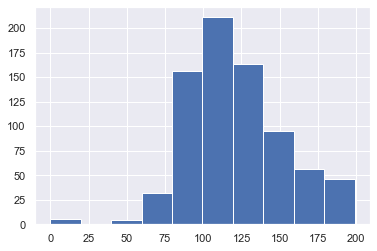

In [18]:
plt.hist(data['Glucose'])

In [19]:
data['BloodPressure'].value_counts().head(7)

70    57
74    52
68    45
78    45
72    44
64    43
80    40
Name: BloodPressure, dtype: int64

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <a list of 10 Patch objects>)

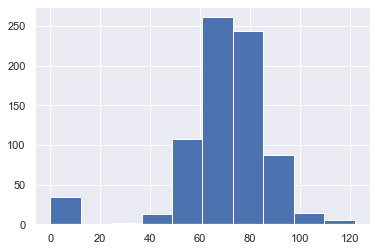

In [20]:
plt.hist(data['BloodPressure'])

In [21]:
data['SkinThickness'].value_counts().head(7)

0     227
32     31
30     27
27     23
23     22
33     20
18     20
Name: SkinThickness, dtype: int64

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

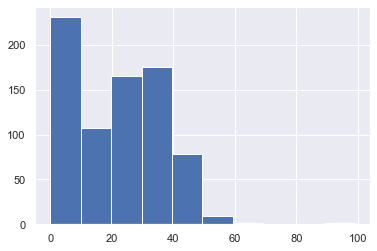

In [22]:
plt.hist(data['SkinThickness'])

In [23]:
data['Insulin'].value_counts().head(7)

0      374
105     11
140      9
130      9
120      8
100      7
94       7
Name: Insulin, dtype: int64

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 10 Patch objects>)

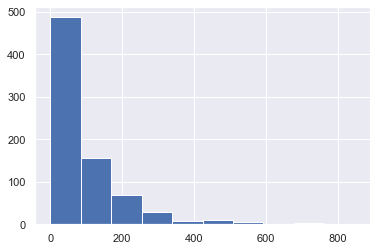

In [24]:
plt.hist(data['Insulin'])

In [25]:
data['BMI'].value_counts().head(7)

32.0    13
31.6    12
31.2    12
0.0     11
33.3    10
32.4    10
32.8     9
Name: BMI, dtype: int64

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

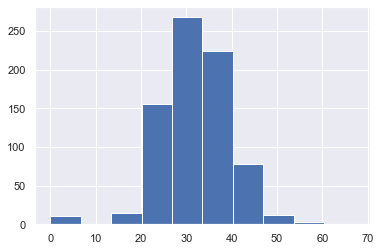

In [26]:
plt.hist(data['BMI'])

In [27]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


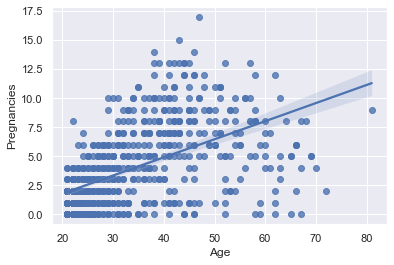

In [28]:
sns.regplot(x='Age', y= 'Pregnancies', data=data)

## Project Task: Week 2

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 <a list of 1 Patch objects>)

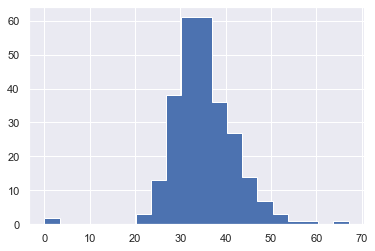

In [29]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20)

In [30]:
Positive['BMI'].value_counts().head(7)

32.9    8
31.6    7
33.3    6
30.5    5
32.0    5
31.2    5
32.4    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 <a list of 1 Patch objects>)

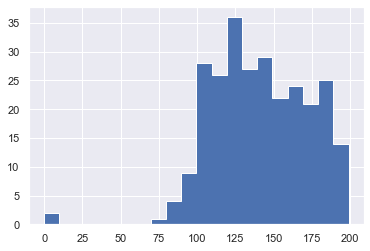

In [31]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20)

In [32]:
Positive['Glucose'].value_counts().head(7)

125    7
158    6
128    6
115    6
129    6
146    5
162    5
Name: Glucose, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 <a list of 1 Patch objects>)

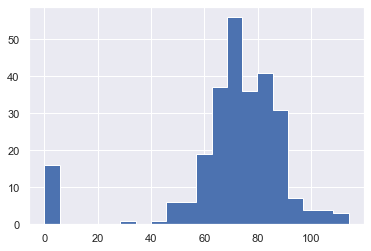

In [33]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20)

In [34]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
Name: BloodPressure, dtype: int64

(array([88.,  1.,  4., 10., 18., 30., 41., 34., 23., 15.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 1 Patch objects>)

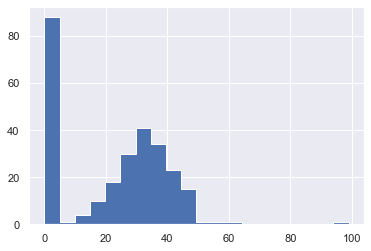

In [35]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20)

In [36]:
Positive['SkinThickness'].value_counts().head(7)

0     88
32    14
33     9
30     9
39     8
35     8
36     8
Name: SkinThickness, dtype: int64

(array([141.,   6.,  23.,  33.,  24.,  12.,   7.,   7.,   2.,   1.,   1.,
          5.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 <a list of 1 Patch objects>)

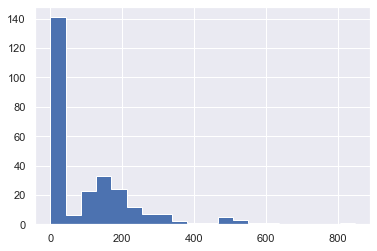

In [37]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20)

In [38]:
Positive['Insulin'].value_counts().head(7)

0      138
130      6
180      4
156      3
175      3
194      2
125      2
Name: Insulin, dtype: int64

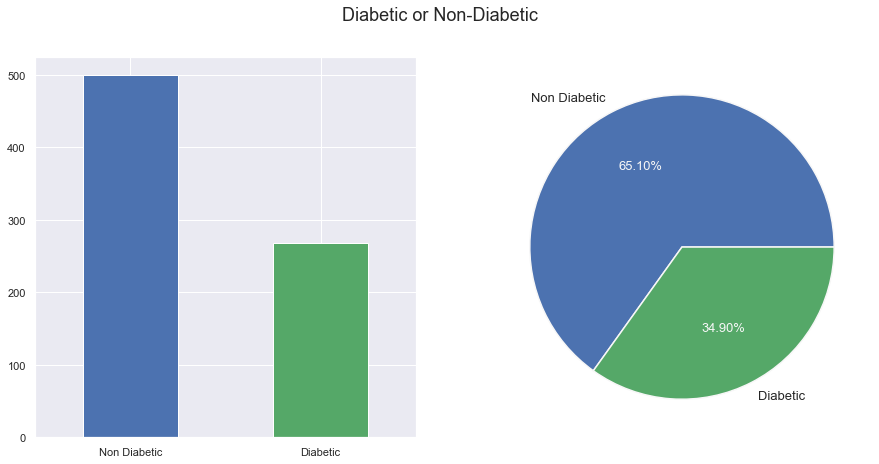

In [39]:
# Initial Data Analysis
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetic or Non-Diabetic", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Non Diabetic", "Diabetic"])
_ = data.Outcome.value_counts().plot.pie(labels = ("Non Diabetic", "Diabetic"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [40]:
Pregnancies = Positive['Pregnancies']
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

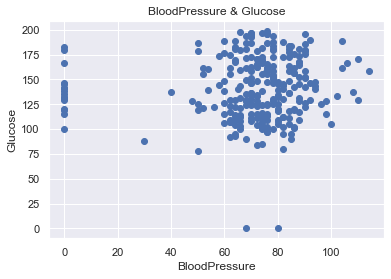

In [41]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

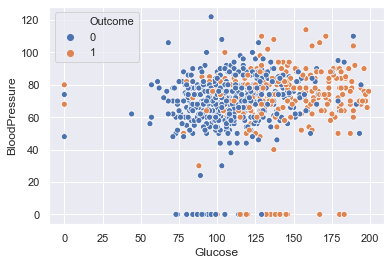

In [42]:
Glucose_BP=sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

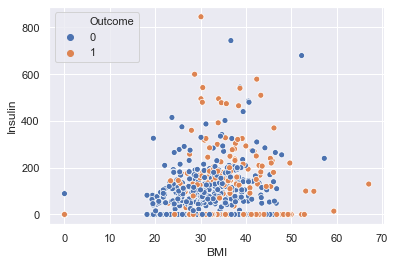

In [43]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=data);

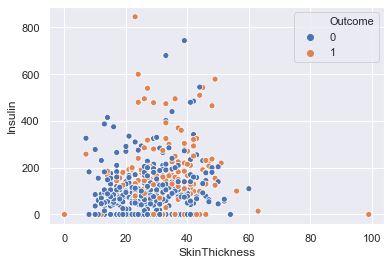

In [44]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);

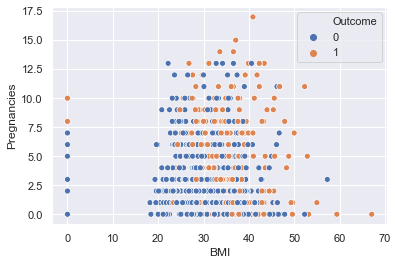

In [45]:
S =sns.scatterplot(x= "BMI" ,y= "Pregnancies",
              hue="Outcome",
              data=data);

## Pair Plots
​
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

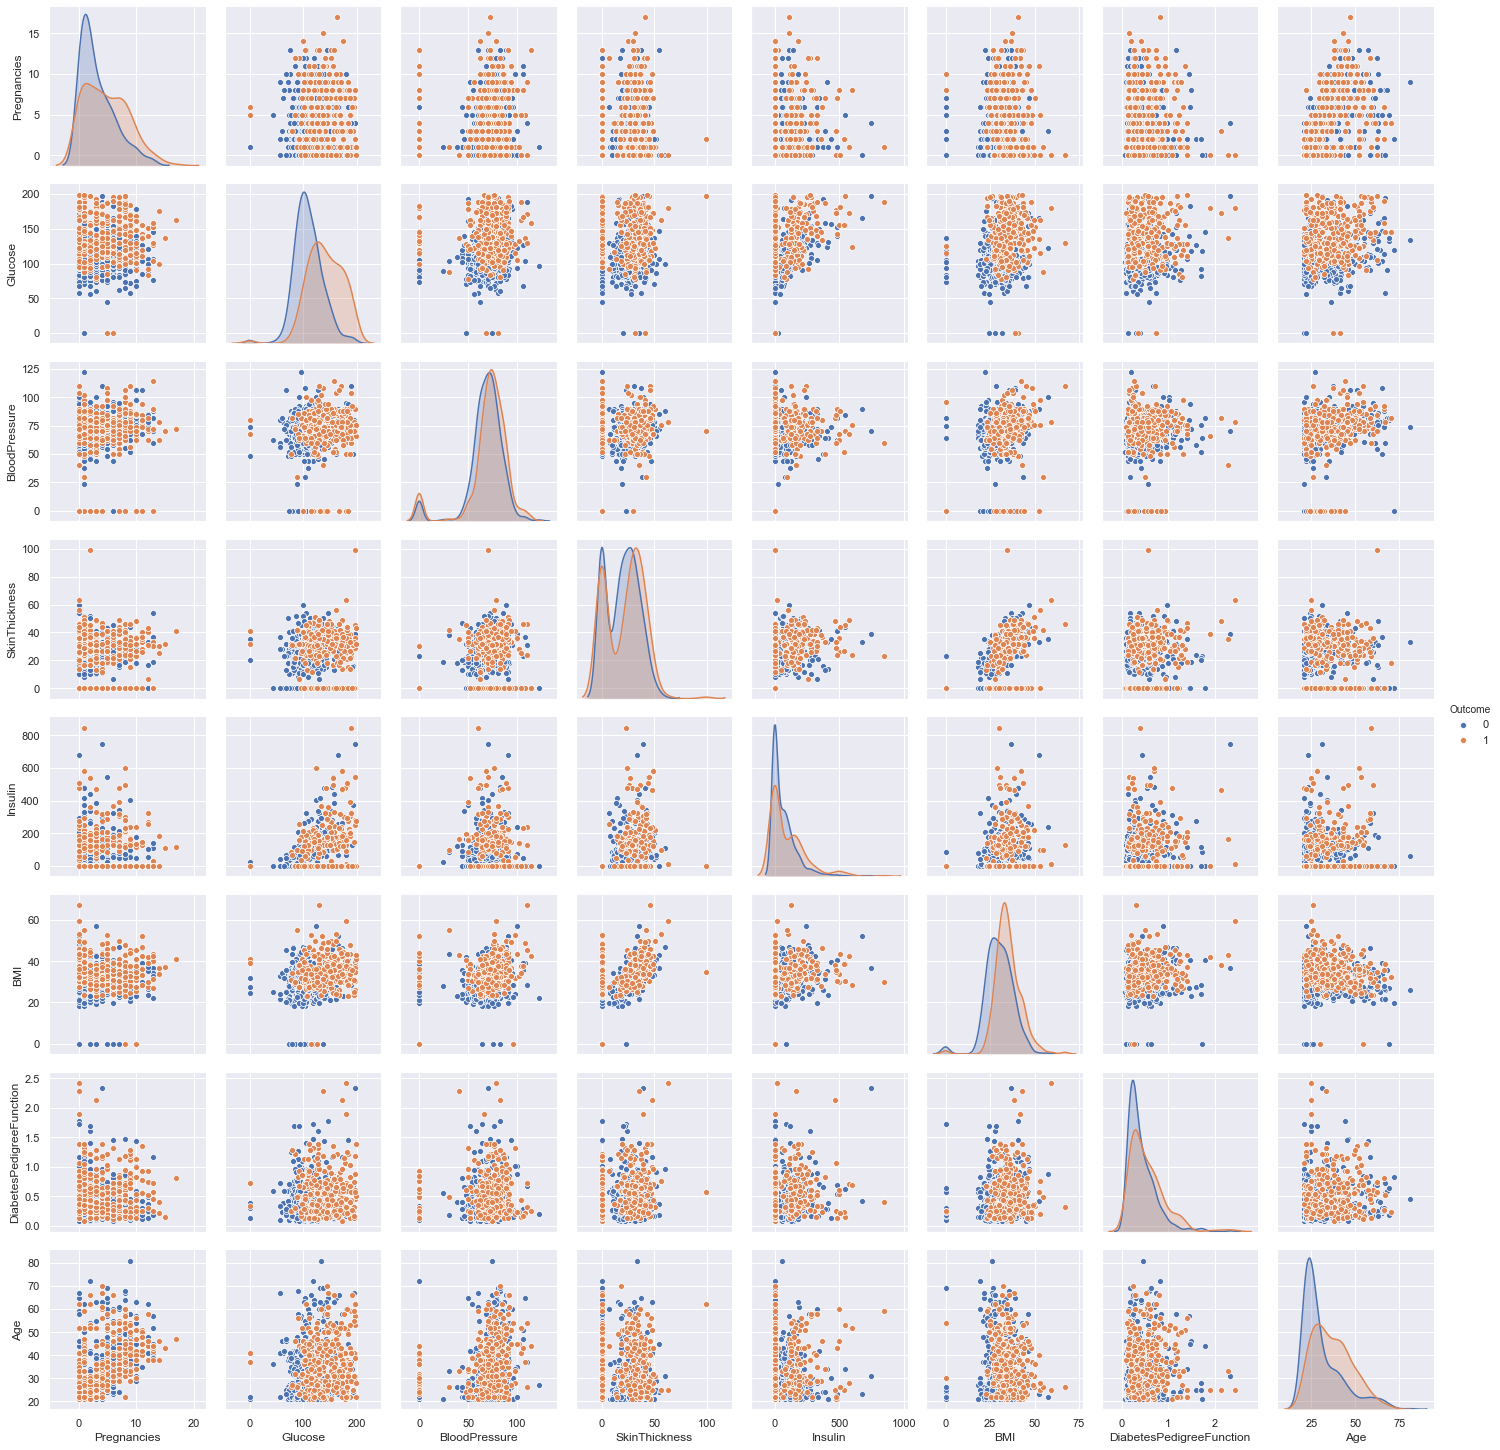

In [46]:
sns.pairplot(data=data,hue='Outcome')

### Correlation between features
Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. 

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

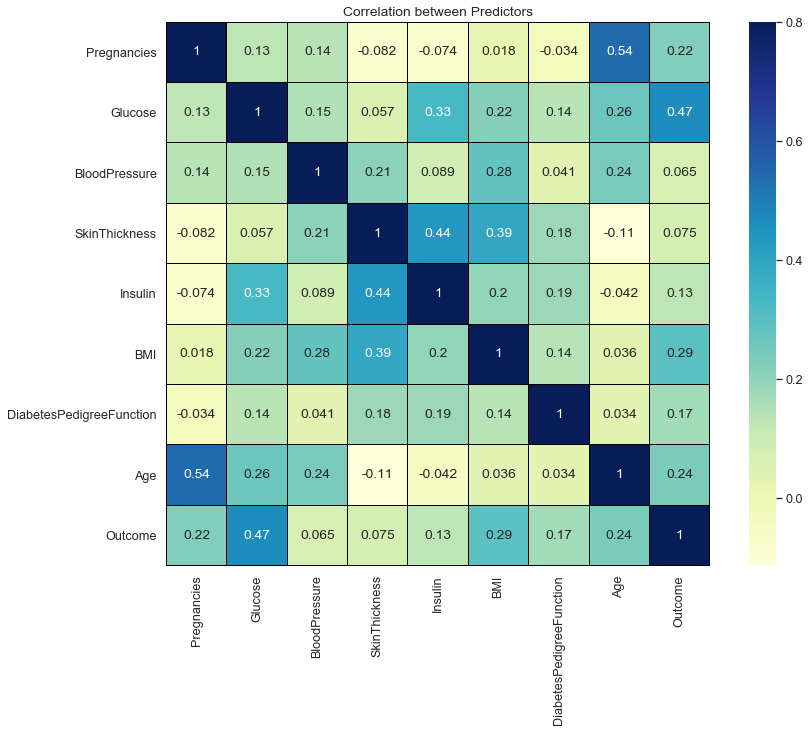

In [47]:
### correlation matrix
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between Predictors');


## Project Task: Week 3

# Predictive Modeling
#### Data Modeling:

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Regression

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

![Logistic Regression](https://miro.medium.com/max/2856/1*KRhpHnucyX9Y5PMdjGvVFA.png)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  79.16666666666666


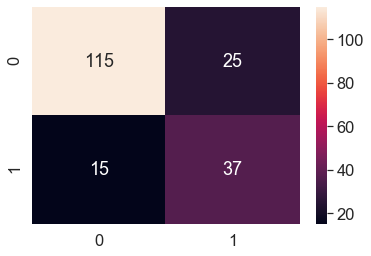

In [49]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## Decision Tree

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.In other words.

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

#### Decision Tree consists of :
* Nodes : Test for the value of a certain attribute.
* Edges/ Branch : Correspond to the outcome of a test and connect to the next node or leaf.
* Leaf nodes : Terminal nodes that predict the outcome (represent class labels or class distribution).

![Decision Tree](https://miro.medium.com/max/1430/1*rSQIIAboJftqAv_BReNipg.png)

Accuracy  72.91666666666666


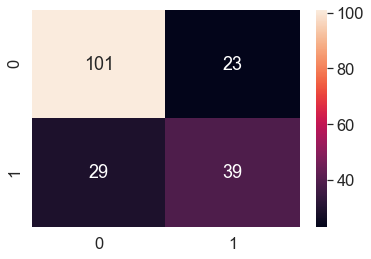

In [50]:
#Model
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## Random Forest

It is an ensemble tree-based learning algorithm. The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

Accuracy  79.6875


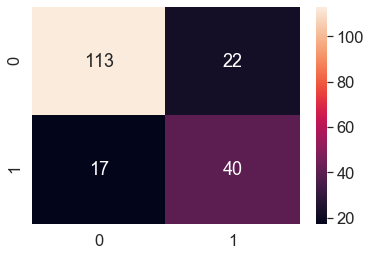

In [51]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=11)
RF.fit(X_train,y_train)


#prediction
y_pred = RF.predict(X_test)

#Accuracy
print("Accuracy ", RF.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## Support Vector Classification

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


Accuracy  67.70833333333334


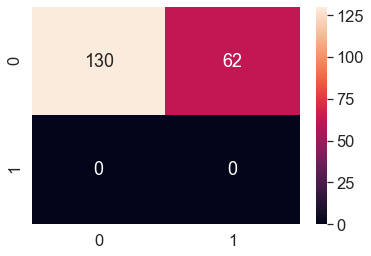

In [64]:
#Support Vector Classifier

from sklearn.svm import SVC 
VC = SVC(kernel='rbf',
           gamma='auto')
VC.fit(X_train,y_train)

VC.score(X_test,y_test)

#prediction
y_pred = VC.predict(X_test)

#Accuracy
print("Accuracy ", VC.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## K-Nearest Neighbors
The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.


![KNN](https://static.javatpoint.com/tutorial/machine-learning/images/k-nearest-neighbor-algorithm-for-machine-learning3.png)

Accuracy  76.04166666666666


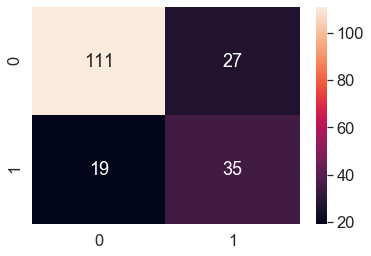

In [53]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
KNN_Model.fit(X_train,y_train)

#prediction
y_pred = KNN_Model.predict(X_test)

#Accuracy
print("Accuracy ", KNN_Model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

## AUC-ROC
In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)

![AUC_ROC](https://www.researchgate.net/profile/Oxana_Trifonova/publication/276079439/figure/fig2/AS:614187332034565@1523445079168/An-example-of-ROC-curves-with-good-AUC-09-and-satisfactory-AUC-065-parameters.png)

AUC: 0.837


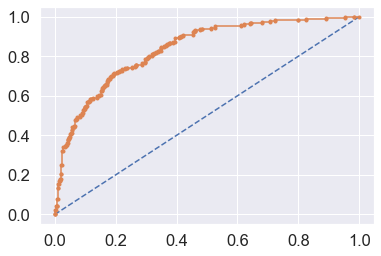

In [54]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = LR.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

AUC: 0.833


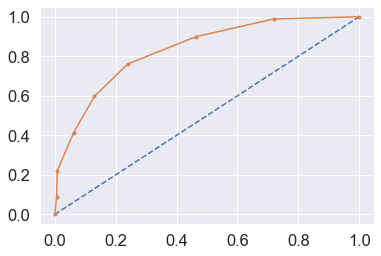

In [56]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = KNN_Model.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

f1=0.649 auc=0.742 ap=0.699


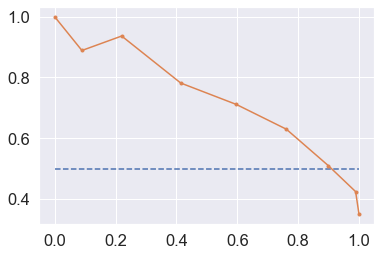

In [57]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = KNN_Model.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = KNN_Model.predict(X)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)
# calculate F1 score
f1 = f1_score(y, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

AUC: 0.928


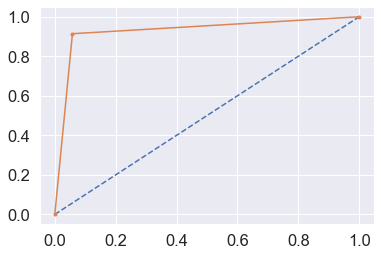

In [58]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = DT.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

f1=0.904 auc=0.919 ap=0.847


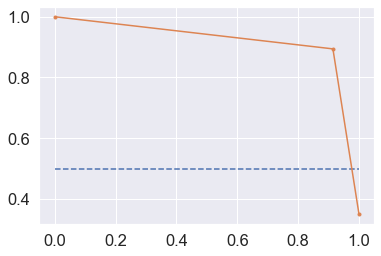

In [59]:
#Precision Recall Curve for Decision Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = DT.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = DT.predict(X)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)
# calculate F1 score
f1 = f1_score(y, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

AUC: 0.973


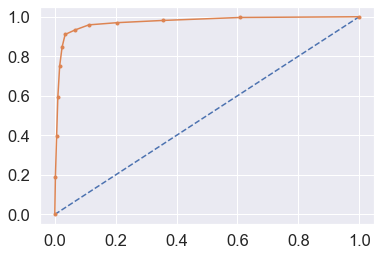

In [60]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = RF.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

f1=0.922 auc=0.953 ap=0.944


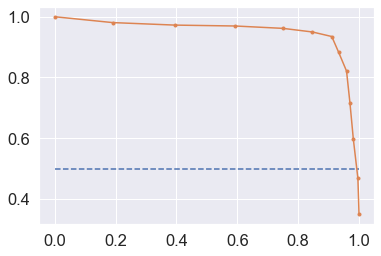

In [61]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = RF.predict_proba(X)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = RF.predict(X)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)
# calculate F1 score
f1 = f1_score(y, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

####                                                                                                                                                                              Author: Rijo Rajan